# **===========================================================================================================================================================** #
# **Incremental Capstone 3** #
# **===========================================================================================================================================================** #

In [277]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import sys

# How to tell python version
#print (sys.version_info)
#print (platform.python_version())

# How to pip install from Terminal window:
# python -m pip install seaborn


In [278]:
print()
print(df_NSME1988_new.describe().T)
print(df_NSME1988_new.info())


                                 count          mean           std      min     25%      50%      75%       max
physician_office_visits         4406.0      5.774399      6.759225      0.0     1.0      4.0      8.0      89.0
nonphysician_office_visits      4406.0      1.618021      5.317056      0.0     0.0      0.0      1.0     104.0
physician_outpatient_visits     4406.0      0.692692      3.451888   -115.0     0.0      0.0      0.0      71.0
nonphysician_outpatient_visits  4406.0      0.477985      3.459950   -101.0     0.0      0.0      0.0     113.0
emergency_room_visits           4406.0      0.263504      0.703659      0.0     0.0      0.0      0.0      12.0
number_of_hospital_stays        4406.0      0.295960      0.746398      0.0     0.0      0.0      0.0       8.0
number_of_chronic_conditions    4406.0      1.541988      1.349632      0.0     1.0      1.0      2.0       8.0
age                             4406.0     74.024058      6.334050     66.0    69.0     73.0     78.0  

## Variable Identification ##

    physician_office_visits         int16	- Numerical Descrete 
    nonphysician_office_visits      int16	- Numerical Descrete  
    physician_outpatient_visits     int16	- Numerical Descrete  
    nonphysician_outpatient_visits  int16	- Numerical Descrete  
    emergency_room_visits           int16	- Numerical Descrete  
    number_of_hospital_stays        int16	- Numerical Descrete  
    overall_health_factor           object  - Categorical Ordinal
    number_of_chronic_conditions    int16	- Numerical Descrete  
    daily_living_activities         object  - Categorical Ordinal
    region                          object  - Categorical Nominal 
    age                             int8	- Numerical  Discrete
    gender                          object  - Categorical Nominal 
    is_married                      bool  	- Categorical Nominal 
    years_of_education              int8	- Numerical Descrete   
    family_income                   int64	- Numerical Continuous 
    is_employed                     bool  	- Categorical Nominal 
    has_health_insurance            bool  	- Categorical Nominal 
    has_medicaid                    bool  	- Categorical Nominal 

    The following are considered Numerical Discrete variables becase they are countable instances of something (number of times you visit office, number of years,..)
        physician_office_visits, nonphysician_office_visits, nonphysician_outpatient_visits, emergency_room_visits, number_of_hospital_stays, years_of_education, age        

    The following are considered Numerical Continuous variables because it has theoretically infinite values and can be measured
        family_income

    The following are Categorical Nominal because they have no inherant order or ranking (one of a group, one or the other, true/false)
        region, gender, is_married, is_employed, has_health_insurance, has_medicaid

    The following are Categorical Ordinal because they can be ranked or ordered (levels of overall_health/daily_activities)
        overall_health_factor, daily_living_activites

    overall_health_factor is really the (dependent variable) (label/role/outcome) that we are trying to predict based on all the other factors.
    We're also trying to determine how relevent the other factors (individually or combined) to overall_health.


## Data Analysis ##
### Univariate Analysis ###

##### Analyzing Number of Visits #####

Number of Columns: 16
Min - Max - Mode Visits
physician_office_visits Min Visits: 0 Max Visits: 89 Mode Visits: 0    0
Name: physician_office_visits, dtype: int16
nonphysician_office_visits Min Visits: 0 Max Visits: 104 Mode Visits: 0    0
Name: nonphysician_office_visits, dtype: int16
physician_outpatient_visits Min Visits: -115 Max Visits: 71 Mode Visits: 0    0
Name: physician_outpatient_visits, dtype: int16
nonphysician_outpatient_visits Min Visits: -101 Max Visits: 113 Mode Visits: 0    0
Name: nonphysician_outpatient_visits, dtype: int16
emergency_room_visits Min Visits: 0 Max Visits: 12 Mode Visits: 0    0
Name: emergency_room_visits, dtype: int16
number_of_hospital_stays Min Visits: 0 Max Visits: 8 Mode Visits: 0    0
Name: number_of_hospital_stays, dtype: int16


Min - Max - Mode Visits - Excluding zero and outliers
physician_office_visits Min Visits: 1 Max Visits: 89 Mode Visits: 0    1
Name: physician_office_visits, dtype: int16
nonphysician_office_visits Min Visits: 1 Max V

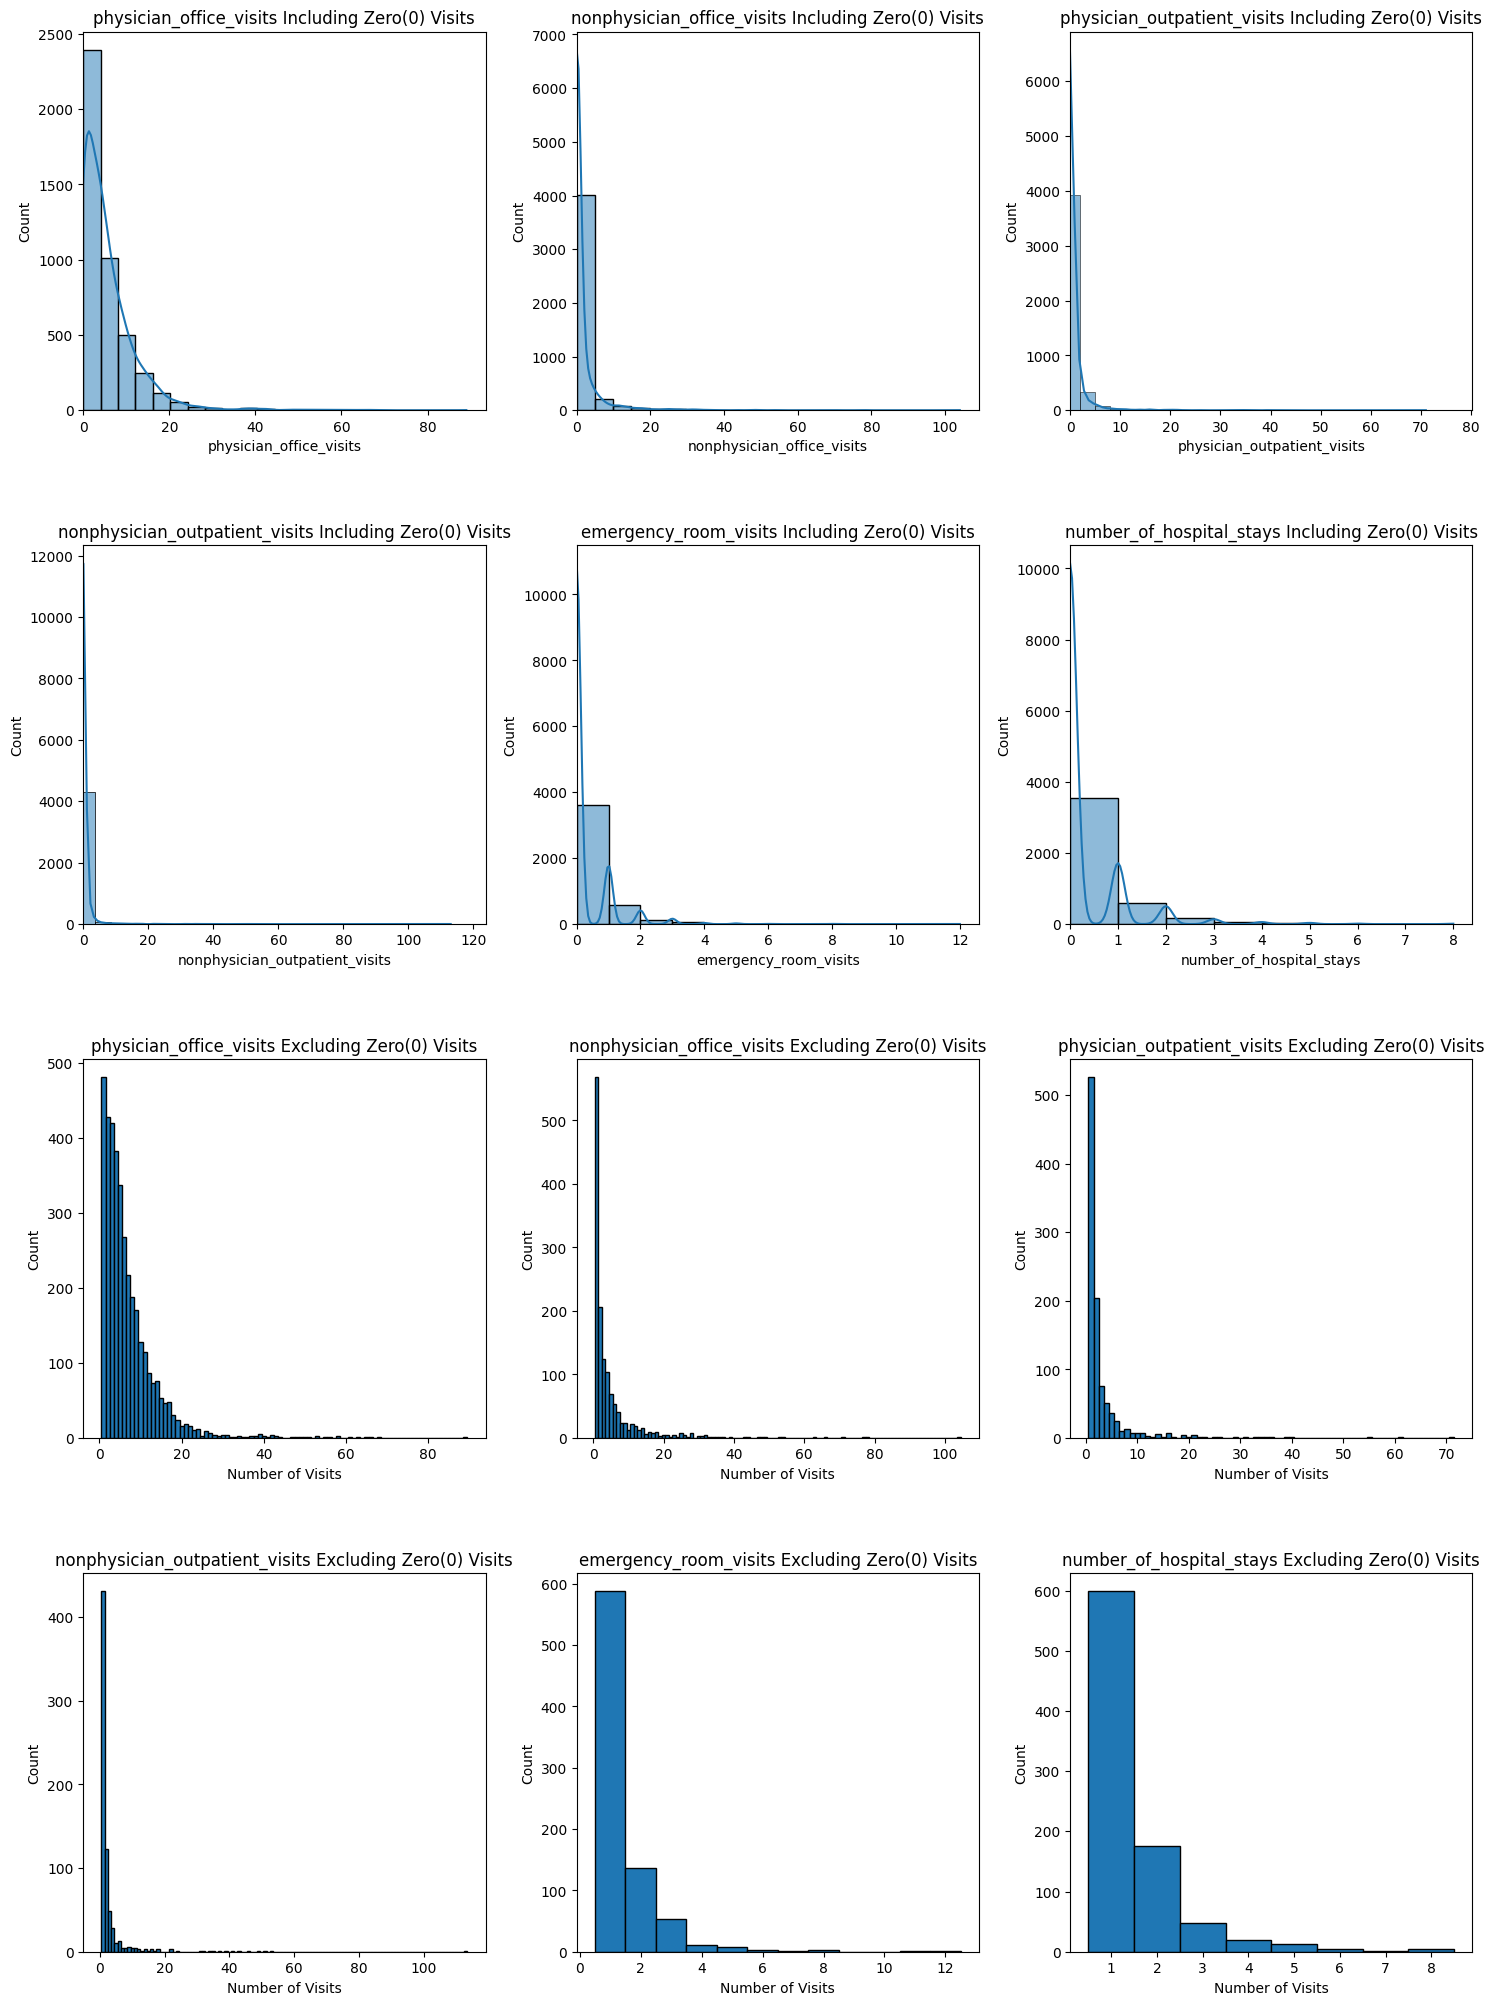

Completed


In [279]:
import matplotlib.scale as mscale

number_of_visit_columns = ['physician_office_visits' ,
                            'nonphysician_office_visits' ,
                            'physician_outpatient_visits' ,
                            'nonphysician_outpatient_visits' ,
                            'emergency_room_visits' ,
                            'number_of_hospital_stays']

n_cols = len(number_of_visit_columns) * 2 + 4
print(f'Number of Columns: {n_cols}')

print('Min - Max - Mode Visits')
for i, col in enumerate(number_of_visit_columns):
    print(f'{col} Min Visits: {df_NSME1988_new[col].min()} Max Visits: {df_NSME1988_new[col].max()} Mode Visits: {df_NSME1988_new[col].mode()}')
print()
print()

print('Min - Max - Mode Visits - Excluding zero and outliers')
for i, col in enumerate(number_of_visit_columns):
    data_gt_zero = df_NSME1988_new[df_NSME1988_new[col] > 0][col]
    print(f'{col} Min Visits: {data_gt_zero.min()} Max Visits: {data_gt_zero.max()} Mode Visits: {data_gt_zero.mode()}')
print()
print()

# I need a 4X4 plot to display 10 histograms
fig, axes = plt.subplots(nrows=(n_cols + 2) // 3, ncols=3, figsize=(15, 5 * ((n_cols + 2) // 3)))
axes = axes.flatten()

# Iterate over each numeric column and plot a historbram
for i, col in enumerate(number_of_visit_columns):
    
    # Initially plots looked weird because of outliers (bad data) and produced less than meaningful results
    # Set x-axis limit to 95th percentile to exclude extreme outliers
    # This only works on visits/number of columns

    max_val = df_NSME1988_new[col].max()
    binwidth = max(1, max_val // 20)  # Divide range into ~20 bins
    sns.histplot(data=df_NSME1988_new, x=col, ax=axes[i], binwidth=binwidth, kde=True)
    axes[i].set_xlim(left=0)
   
    # tried different scaling techniques and results are still weird
    #axes[i].set_yscale('function', functions=(lambda x: x**0.5, lambda x: x**2))
    #axes[i].set_yscale('log')
    # trying binning (above) next; finally binwidt

    axes[i].set_title(f'{col} Including Zero(0) Visits')

# Excluding zeros
for i, col in enumerate(number_of_visit_columns):
    
    # Initially plots looked weird because of outliers (bad data) and produced less than meaningful results
    # Set x-axis limit to 95th percentile to exclude extreme outliers
    # This only works on visits/number of columns
    
    # Filter out zeros
    data_no_zeros = df_NSME1988_new[df_NSME1988_new[col] > 0][col]
    
    max_val = data_no_zeros.max()
    bins = np.arange(0.5, max_val + 1.5, 1)
    
    j = i + 6
    axes[j].hist(data_no_zeros, bins=bins, edgecolor='black')
    axes[j].set_xlabel('Number of Visits')
    axes[j].set_ylabel('Count')

    axes[j].set_title(f'{col} Excluding Zero(0) Visits')    

    
# Hide the blank/empty graphs
for j in range(j + 1, len(axes)):
    axes[j].set_visible(False)

# Make plots more readable and add space
plt.tight_layout(h_pad=5)
plt.show()    
print("Completed")

##### Number of Visits Analysis ####
    All the plots have a strong right (positive) skewed shape
    In most cases zero (0) is the highest number of visits.
    There were also several (negative) outliers which indicates bad data (you can't have -99 visits..)
    I tried to get around this be set the ylimit to account for these.
    I tried different scales/binning techniques to make the plots more readable/interpretable

    Central Mean Tendency - including zero visits

        physician_office_visits Min Visits: 0 Max Visits: 89 Mode Visits: 0    
        nonphysician_office_visits Min Visits: 0 Max Visits: 104 Mode Visits: 0    
        physician_outpatient_visits Min Visits: -115 Max Visits: 71 Mode Visits: 0    
        nonphysician_outpatient_visits Min Visits: -101 Max Visits: 113 Mode Visits: 0    
        emergency_room_visits Min Visits: 0 Max Visits: 12 Mode Visits: 0    
        number_of_hospital_stays Min Visits: 0 Max Visits: 8 Mode Visits: 0    

    Central Mean Tendency - excluding zero visits
    (I thought it would be interesting examine these values excluding values <=0 - Excluding 0 and negative outliers)
        physician_office_visits Min Visits: 1 Max Visits: 89 Mode Visits: 1
        nonphysician_office_visits Min Visits: 1 Max Visits: 104 Mode Visits: 1
        physician_outpatient_visits Min Visits: 1 Max Visits: 71 Mode Visits: 1
        nonphysician_outpatient_visits Min Visits: 1 Max Visits: 113 Mode Visits: 1
        emergency_room_visits Min Visits: 1 Max Visits: 12 Mode Visits: 1
        number_of_hospital_stays Min Visits: 1 Max Visits: 8 Mode Visits: 1

    Based on this, clearly the lower occurring number of visits are dominant in this data set.
    As the number if visits increases, number of instances of visits decreases (inverse relationship)

##### Additional Analysis #####

Number of Columns: 8


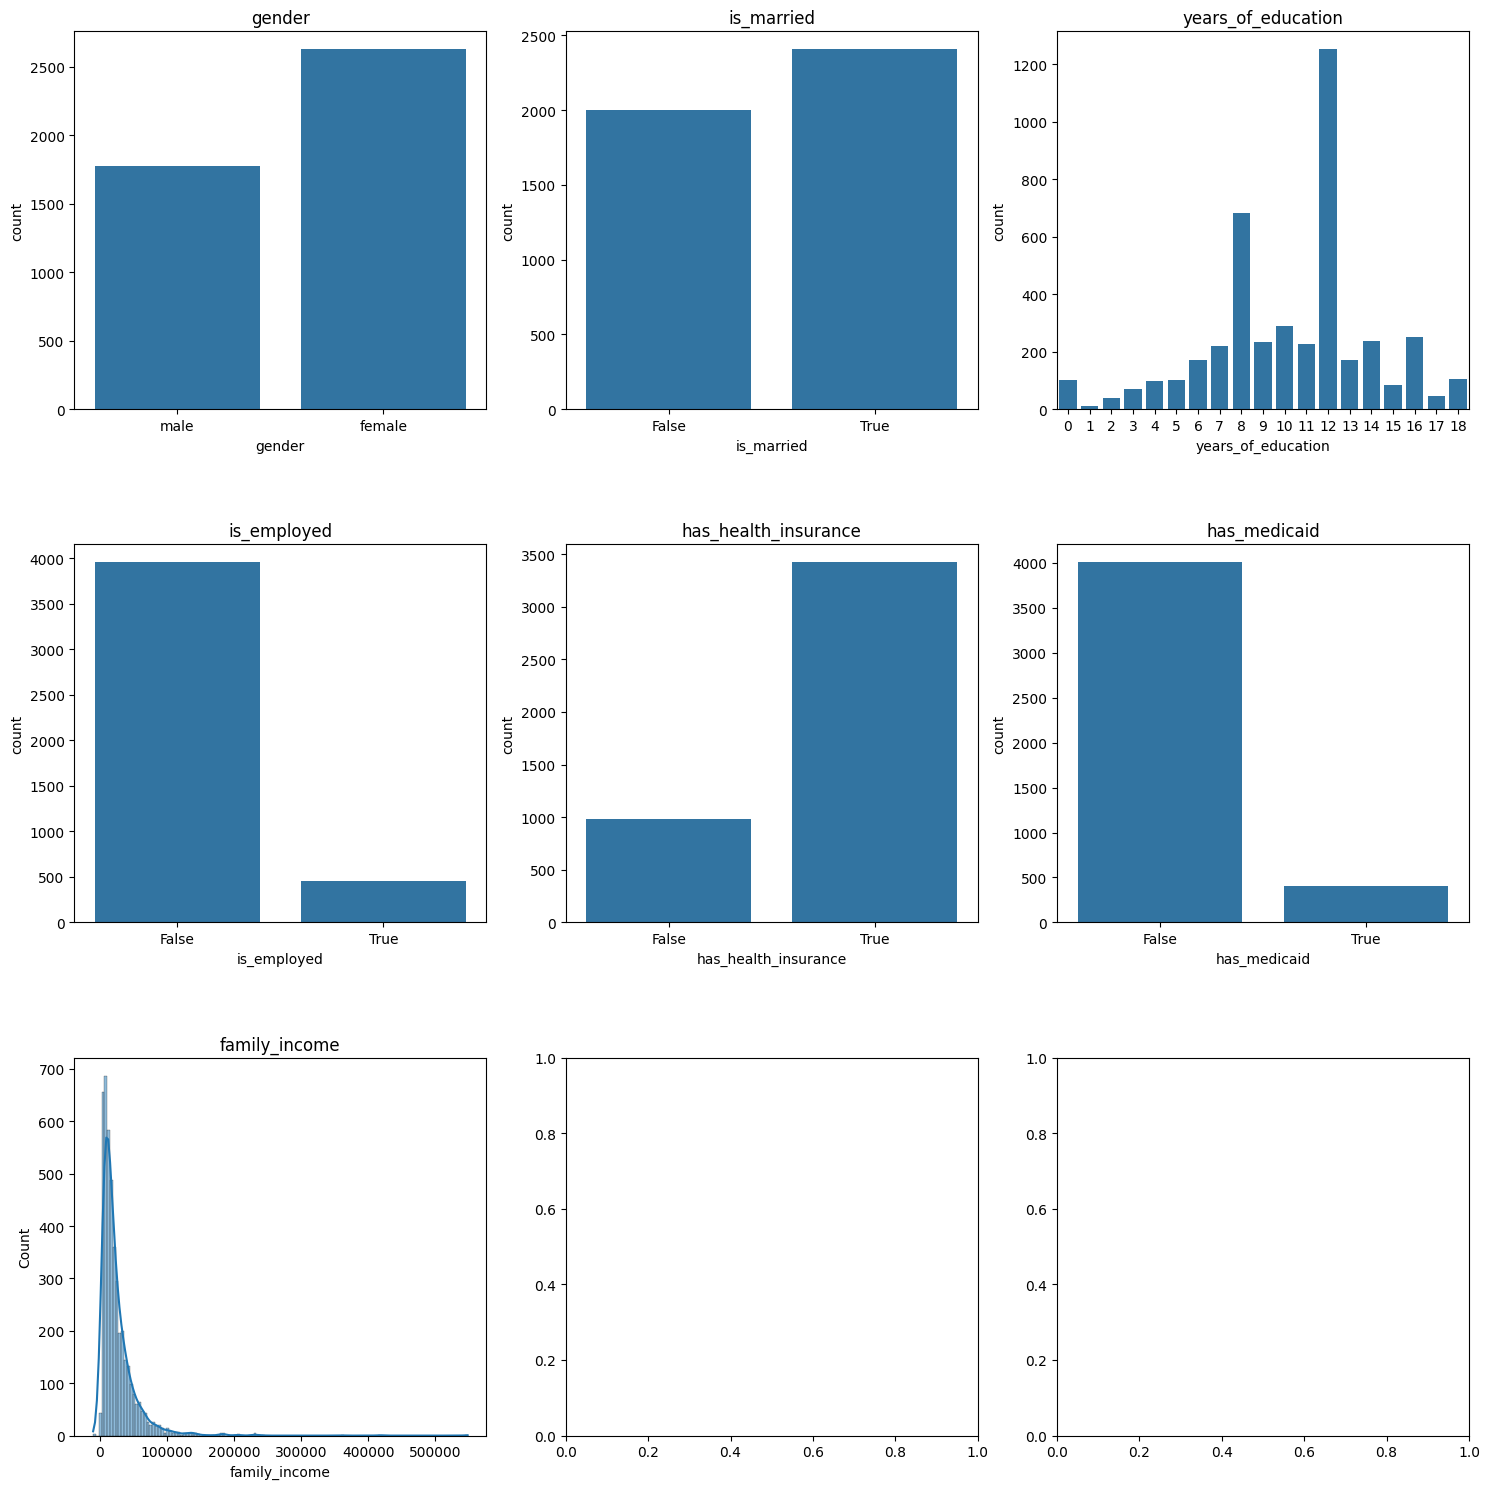

In [280]:
# The columns we want to plot:
columns_to_plot = [ 'gender' ,
                    'is_married' ,
                    'years_of_education' ,
                    'is_employed' ,
                    'has_health_insurance' ,
                    'has_medicaid']

n_cols = len(columns_to_plot) + 2
print(f'Number of Columns: {n_cols}')

# I need a 4X4 plot to display 10 histograms
fig, axes = plt.subplots(nrows=(n_cols + 2) // 3, ncols=3, figsize=(15, 5 * ((n_cols + 2) // 3)))
axes = axes.flatten()

#sns.countplot(data=df_NSME1988_new, x='gender', ax=axes[0])

#Iterate over each numeric column and plot a historgram
for i, col in enumerate(columns_to_plot):
    
    sns.countplot(data=df_NSME1988_new, x=col, ax=axes[i])
    axes[i].set_title(col)

i+=1
sns.histplot(data=df_NSME1988_new, x='family_income', ax=axes[i], kde=True)    
axes[i].set_title('family_income')

# Make plots more readable and add space
plt.tight_layout(h_pad=5)
plt.show()    

In [281]:
print('Min - Max - Mode Visits')
col = 'years_of_education'
print(f'{col} Min: {df_NSME1988_new[col].min()} Max: {df_NSME1988_new[col].max()} Mode: {df_NSME1988_new[col].mode()}')
col = 'family_income'
print(f'{col} Min: {df_NSME1988_new[col].min()} Max: {df_NSME1988_new[col].max()} Mode: {df_NSME1988_new[col].mode()}')
print()
print()

Min - Max - Mode Visits
years_of_education Min: 0 Max: 18 Mode: 0    12
Name: years_of_education, dtype: int8
family_income Min: -10125 Max: 548351 Mode: 0    4320
Name: family_income, dtype: int64




##### Analysis of remaining requested columns ####
    Gender - relatively balanced distribution, more women than men
    Married - relatively balanced distribution, more yes than no
    Years of Education - hard to read based on plot. Looks like it almost wants to be normal distibution but kind of looks right skewed
    Employed - There seems to be a lot more unemployed than employed people in this data set (by a large margin 40 - 5 ratio)
    Has Health Insurance - Most people have health insurance by a large margin (~3.5X as many people have health insurance than not)
    Had Medicaid - Most people have do not have medicaid by a large margin (~8X as many people do not have medicaid)
    Family Income - Definite right (positive) skew to the data


    Central Mean Tendency: 
        years_of_education Min: 0 Max: 18 Mode: 12
        family_income Min: -10125 Max: 548351 Mode: 4320

    Family income definitely has outlier (bad) data with substantial negative income
    

    

##### Distribution of Patient Visit Types - occurances of each type #####

{'physician_office_visits': np.int64(25442), 'nonphysician_office_visits': np.int64(7129), 'physician_outpatient_visits': np.int64(3052), 'nonphysician_outpatient_visits': np.int64(2106), 'emergency_room_visits': np.int64(1161), 'number_of_hospital_stays': np.int64(1304)}


C:\Users\jxbma\AppData\Local\Temp\ipykernel_37412\3893749027.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(total_visits.keys()), y=list(total_visits.values()), palette='viridis')


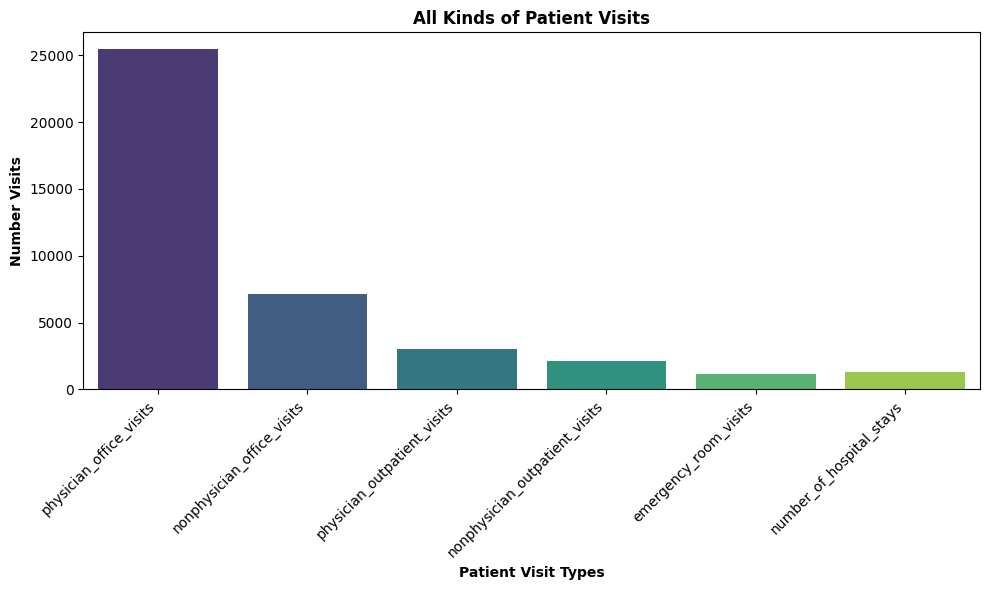

In [282]:
total_visits = { 'physician_office_visits' : df_NSME1988_new['physician_office_visits'].sum(),
                 'nonphysician_office_visits' : df_NSME1988_new['nonphysician_office_visits'].sum(),
                 'physician_outpatient_visits' : df_NSME1988_new['physician_outpatient_visits'].sum(),
                 'nonphysician_outpatient_visits' : df_NSME1988_new['nonphysician_outpatient_visits'].sum(),
                 'emergency_room_visits': df_NSME1988_new['emergency_room_visits'].sum(),
                 'number_of_hospital_stays' : df_NSME1988_new['number_of_hospital_stays'].sum()}

print(total_visits)

plt.subplots(figsize=(10, 6))


# Title and Label axes
plt.title(f'All Kinds of Patient Visits', fontweight='bold')
plt.xlabel('Patient Visit Types', fontweight='bold')
plt.ylabel('Number Visits', fontweight='bold')
plt.xticks(rotation=45, ha='right')

sns.barplot(x=list(total_visits.keys()), y=list(total_visits.values()), palette='viridis')

plt.tight_layout(h_pad=3)
plt.show()

#### Create Crosstabs for Requested Distributions ####

age_group: age_group
66-70    1568
71-75    1266
76-80     846
81-85     479
86+       247
Name: count, dtype: int64

gender: gender
female    2628
male      1778
Name: count, dtype: int64
overall_health_factor: overall_health_factor
average      3509
poor          554
excellent     343
Name: count, dtype: int64

gender: gender
female    2628
male      1778
Name: count, dtype: int64
income_category: income_category
10-25k     1682
<10k       1229
25-50k      973
50-100k     406
100k+        95
Name: count, dtype: int64

gender: gender
female    2628
male      1778
Name: count, dtype: int64
region: region
other        1614
midwest      1157
northeast     837
west          798
Name: count, dtype: int64

income_category: income_category
10-25k     1682
<10k       1229
25-50k      973
50-100k     406
100k+        95
Name: count, dtype: int64
age_group: age_group
66-70    1568
71-75    1266
76-80     846
81-85     479
86+       247
Name: count, dtype: int64

income_category: income_category

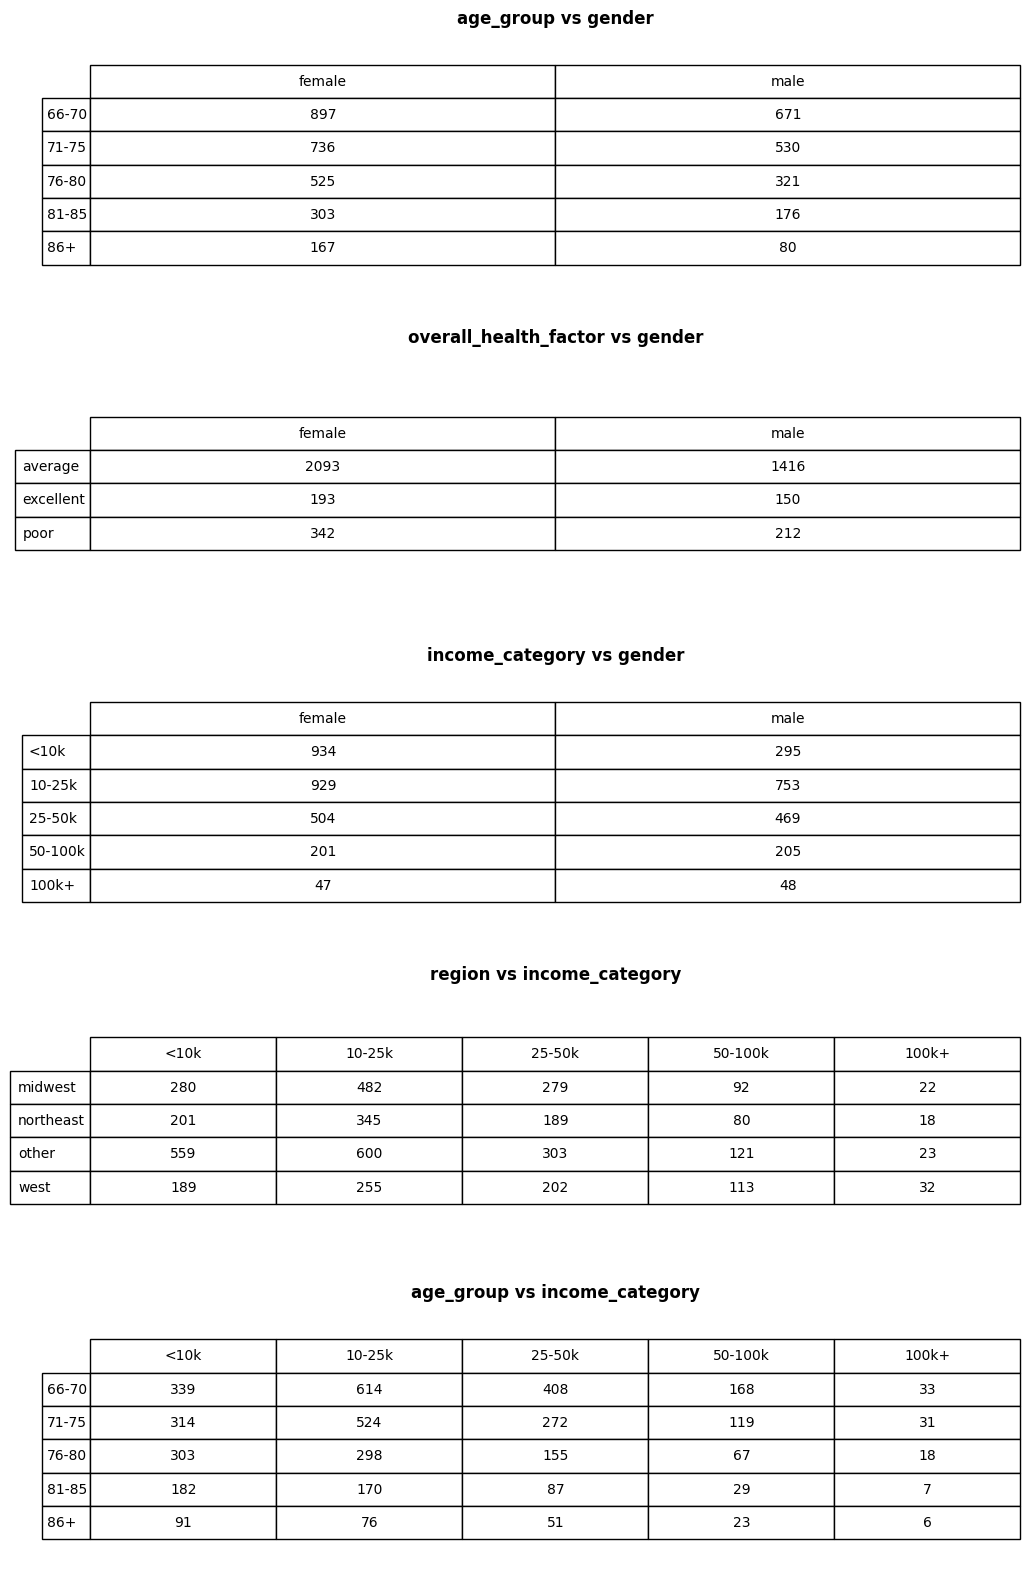

In [283]:

# Performance was horrible with family_income, trying to bin it instead
# Create income categories instead of raw values
# Bin Ages as well for cleaner display
df_NSME1988_new['income_category'] = pd.cut(
    df_NSME1988_new['family_income'], 
    bins=[0, 10000, 25000, 50000, 100000, 1000000],
    labels=['<10k', '10-25k', '25-50k', '50-100k', '100k+']
)

df_NSME1988_new['age_group'] = pd.cut(
    df_NSME1988_new['age'],
    bins=[65, 70, 75, 80, 85, 120],
    labels=['66-70', '71-75', '76-80', '81-85', '86+']
)

# Distributions
features = [ 
    ('age_group', 'gender'),
    ('overall_health_factor', 'gender'),
    ('income_category', 'gender'),
    ('region', 'income_category'),
    ('age_group', 'income_category')
]
features_with_crosstabs = []

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 20))
axes = axes.flatten()
i = 0

for feature1, feature2 in features:

    feature1_counts = df_NSME1988_new[feature1].value_counts()
    feature2_counts = df_NSME1988_new[feature2].value_counts()
    print(f'{feature1}: {feature1_counts}')
    print()
    print(f'{feature2}: {feature2_counts}')

    # Create crosstab
    ct = pd.crosstab(df_NSME1988_new[feature1], df_NSME1988_new[feature2])
    features_with_crosstabs.append((feature1, feature2, ct))

    axes[i].axis('tight')
    axes[i].axis('off')

    # Create table
    table = axes[i].table(cellText=ct.values, 
                          rowLabels=ct.index, 
                          colLabels=ct.columns,
                          cellLoc='center',
                          loc='center')

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)  # Adjust cell height

    axes[i].set_title(f'{feature1} vs {feature2}', fontsize=12, fontweight='bold')
    i +=1


plt.show()

#### Heat Maps (plots) of Requested Distributions ####

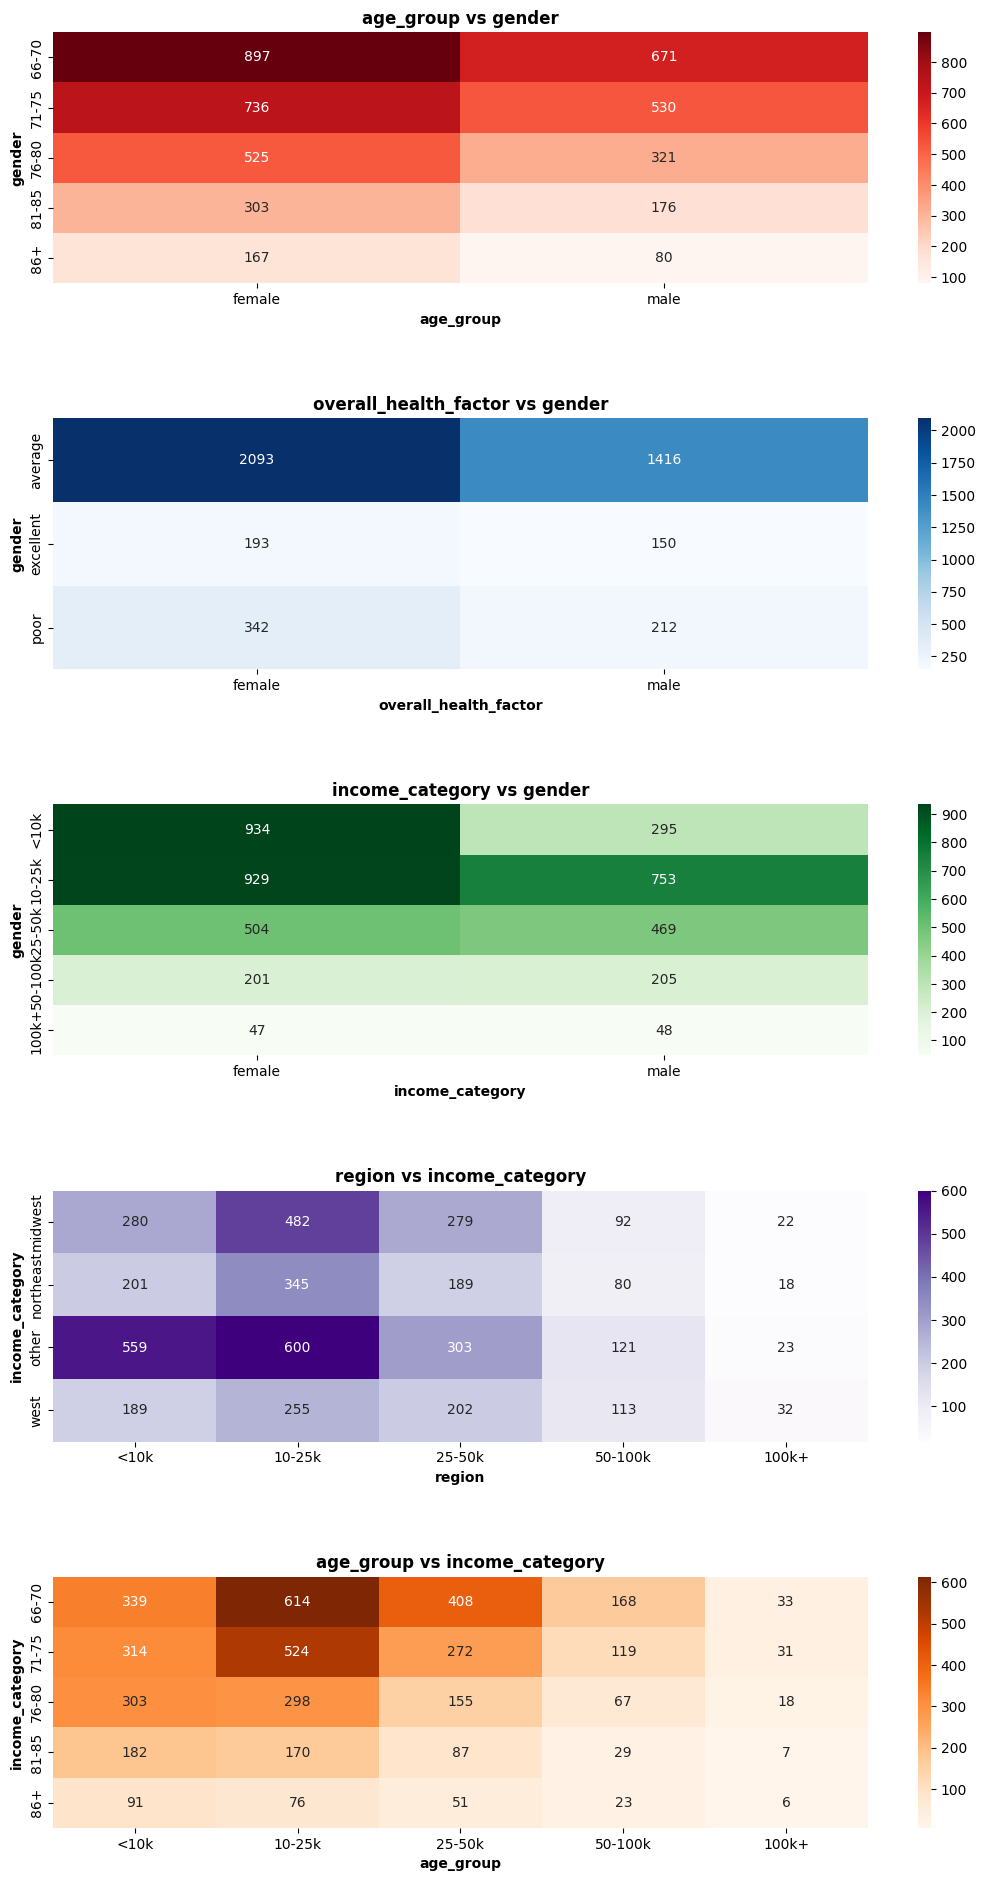

In [284]:

colors = ['Reds', 'Blues', 'Greens', 'Purples', 'Oranges']
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 20))
axes = axes.flatten()
i = 0

for feature1, feature2, ct in features_with_crosstabs:

    sns.heatmap(ct, annot=True, fmt='d', cmap=colors[i], ax=axes[i])

    # Title and Label axes
    axes[i].set_title(f'{feature1} vs {feature2}', fontweight='bold')
    axes[i].set_xlabel(f'{feature1}', fontweight='bold')
    axes[i].set_ylabel(f'{feature2}', fontweight='bold')

    i += 1

plt.tight_layout(pad=5) 
plt.show()